In [110]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import sys
import os
import multiprocessing as mp
import numpy as np
import dxchange
import matplotlib.pyplot as plt
import ipywidgets as widgets
import tomopy
from ipywidgets import interact, fixed, IntSlider
from ipyfilechooser import FileChooser
import tifffile as tif
sys.path.append('backend')
import recon_functions as rf
import recon_helper as helper
plt.ion() # this makes all the plots update properly
# use_gpu = rf.check_for_gpu()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Choose the Folder Path Containing the Data

In [ ]:
dataDir = "/Users/wije370/Desktop/Hasitha_XCT/" if os.path.exists("/Users/wije370") else os.getcwd() #change the path accordingly

file_chooser = FileChooser(dataDir, show_only_dirs=True)
file_chooser.use_dir_icons = True  # Show directory icons
file_chooser.title = f'Choose data directory'
display(file_chooser)

FileChooser(path='/Users/wije370/Library/CloudStorage/OneDrive-PNNL/Desktop/Hasitha_XCT', filename='', title='…

## Find the Centre of Rotation (COR)

5.875


Output()

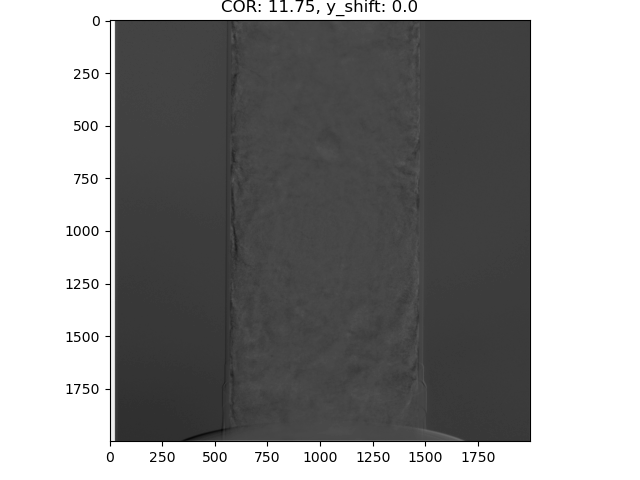

In [ ]:
# Reading the .XML file and image file names seperately

if file_chooser.selected is None:
    print("No datafile selected. Click Select to choose a datafile")
    sys.exit()

xml_path, ang_path, tif_path = rf.file_paths(file_chooser.selected)
proj_0_idx, proj_180_idx = rf.angel_parser(file_chooser.selected+ang_path)


#reading 0 and 180 degree projections
proj_0 = tif.imread(file_chooser.selected+rf.xml_parser(file_chooser.selected+xml_path, *['ProfileName'])[0]+f'_{proj_0_idx:04d}.tif')
proj_180_flipped = np.fliplr(tif.imread(file_chooser.selected+rf.xml_parser(file_chooser.selected+xml_path, *['ProfileName'])[0]+f'_{proj_180_idx:04d}.tif'))

cor_init = tomopy.find_center_pc(proj_0, proj_180_flipped, tol=0.25)
cor_init = cor_init - proj_0.shape[1]/2

axs, img, cor_sliders, cor_out = rf.plot_0_and_180_proj_diff(proj_0,
                                                              proj_180_flipped,
                                                              init_cor=2*cor_init,
                                                              # yshift=True,
                                                              fignum=0)
                                                            

display(cor_sliders,cor_out)

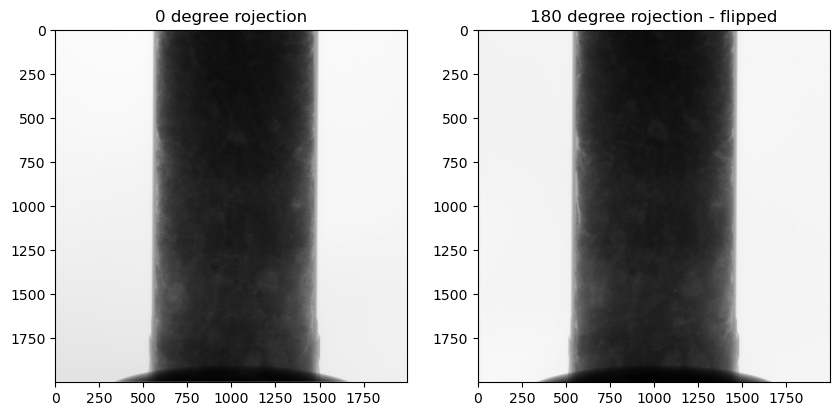

In [ ]:
plt. figure(figsize=(10,20))
plt.subplot(1, 2, 1)
plt.imshow(proj_0,cmap='gray')
plt.title("0 degree projection")
plt.subplot(1, 2, 2)
plt.imshow(proj_180_flipped,cmap='gray')
plt.title("180 degree projection - flipped")
plt.show()

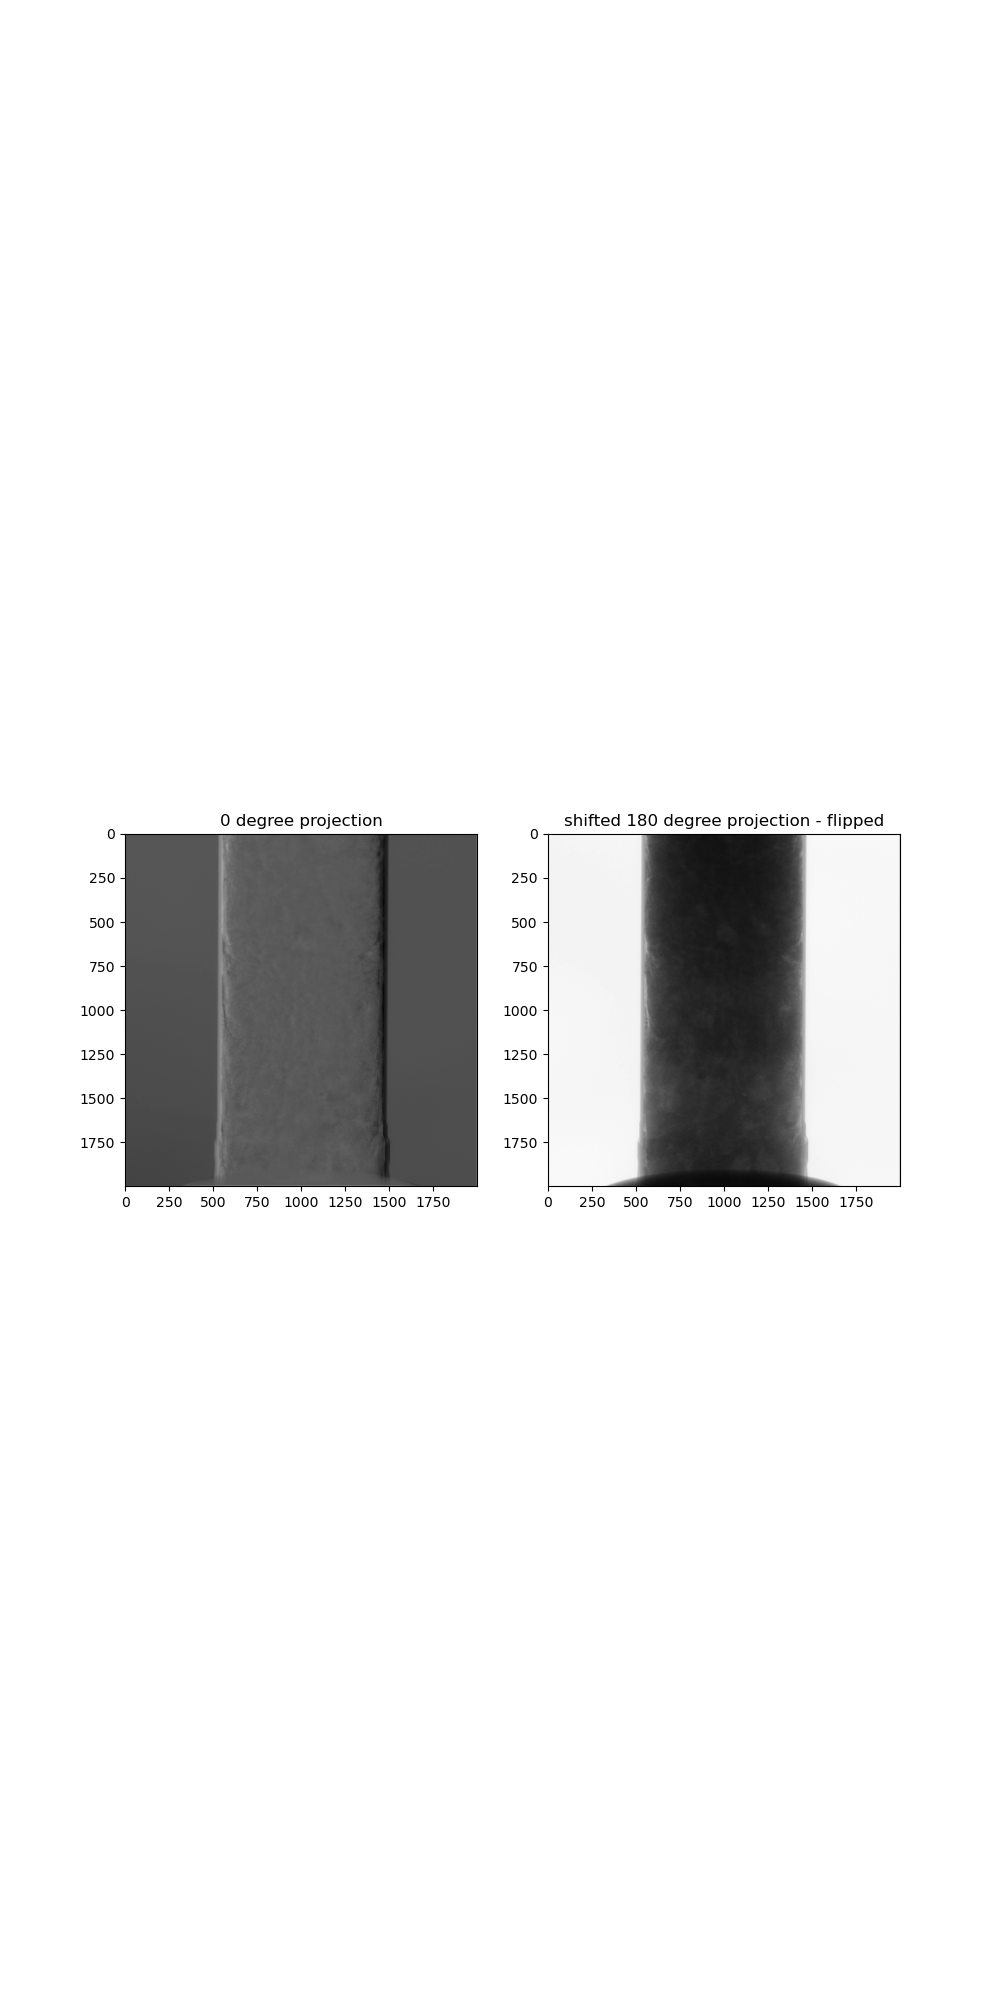

In [117]:
from skimage import transform

translateFunction = transform.SimilarityTransform(translation=(cor_init, 0))
shifted = transform.warp(proj_180_flipped.astype(np.float64), translateFunction)

plt. figure(figsize=(10,20))
plt.subplot(1, 2, 1)
plt.imshow(proj_0 - shifted,cmap='gray')
plt.title("0 degree projection")
plt.subplot(1, 2, 2)
plt.imshow(shifted,cmap='gray')
plt.title("shifted 180 degree projection - flipped")
plt.show()